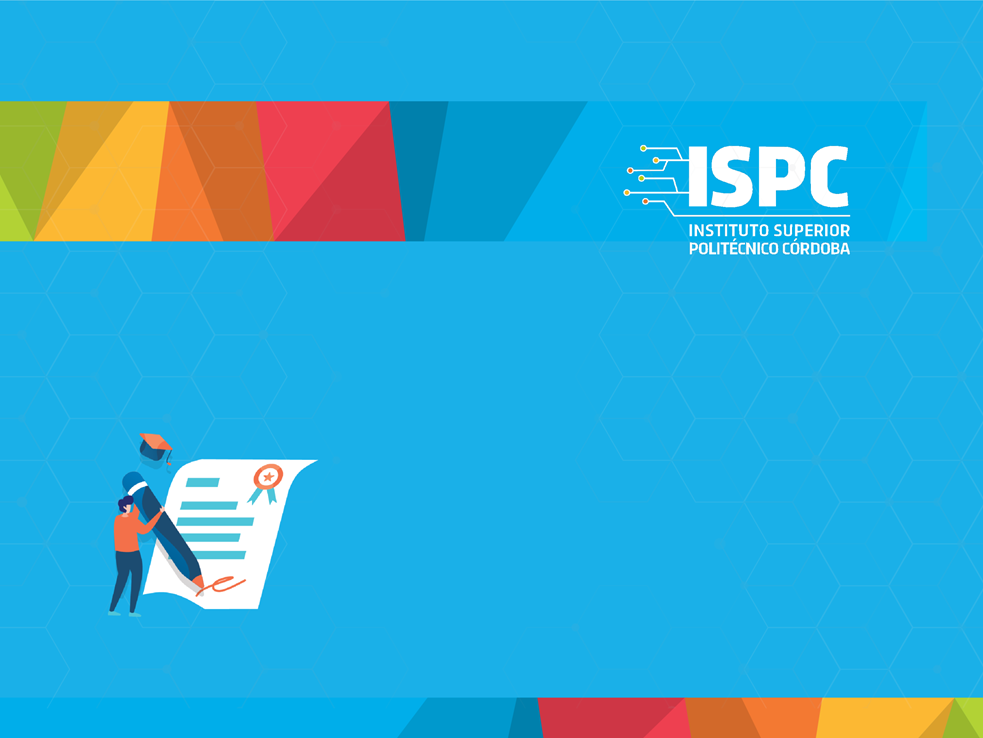

# Métricas De Evaluación De Modelos En El Aprendizaje Automático

Fuente:
https://www.datasource.ai/es/data-science-articles/metricas-de-evaluacion-de-modelos-en-el-aprendizaje-automatico


Los modelos predictivos se han convertido en un asesor de confianza para muchas empresas y por una buena razón. Estos modelos pueden "prever el futuro", y hay muchos métodos diferentes disponibles, lo que significa que cualquier industria puede encontrar uno que se ajuste a sus retos particulares.

Cuando hablamos de modelos predictivos, nos referimos a un modelo de regresión (salida continua) o a un modelo de clasificación (salida nominal o binaria). En los problemas de clasificación, utilizamos dos tipos de algoritmos (dependiendo del tipo de salida que este crea):

    Salida de clase: Algoritmos como Support Vector Machine y K Nearest Neighbors crean una salida de clase. Por ejemplo, en un problema de clasificación binaria, las salidas serán 0 o 1. Sin embargo, hoy en día tenemos algoritmos que pueden convertir estas salidas de clase en probabilidad.
    
    Salida de probabilidad: Algoritmos como la Regresión Logística, el Bosque Aleatorio, potenciación del Gradiente, el Adaboost, etc. dan salidas de probabilidad. Convertir las salidas de probabilidad en salidas de clase es sólo cuestión de crear un umbral de probabilidad


## Introducción

Si bien la preparación de los datos y el entrenamiento de un modelo de aprendizaje es un paso clave en el proceso de aprendizaje automático, es igualmente importante medir el rendimiento de este modelo entrenado. Lo bien que el modelo generaliza sobre los datos no vistos es lo que define los modelos de aprendizaje automático adaptables frente a los no adaptables.

Al utilizar diferentes métricas para la evaluación del rendimiento, deberíamos estar en posición de mejorar el poder de predicción general de nuestro modelo antes de que lo pongamos en marcha para la producción sobre datos no vistos antes.

Si no se realiza una evaluación adecuada del modelo aprendizaje automático utilizando diferentes métricas, y se usa sólo la precisión, puede darse un problema cuando el modelo respectivo se despliega sobre datos no vistos y puede dar lugar a malas predicciones.

Esto sucede porque, en casos como éste, nuestros modelos no aprenden sino que memorizan; por lo tanto, no pueden generalizar bien sobre datos no vistos.

## Métricas de evaluación del modelo

Definamos ahora las métricas de evaluación para valorar el rendimiento de un modelo de aprendizaje automático, que es un componente integral de cualquier proyecto de ciencia de los datos. Su objetivo es estimar la precisión de la generalización de un modelo sobre los datos futuros (no vistos/fuera de muestra).

Matriz de confusión
Una matriz de confusión es una representación matricial de los resultados de las predicciones de cualquier prueba binaria que se utiliza a menudo para describir el rendimiento del modelo de clasificación (o "clasificador") sobre un conjunto de datos de prueba cuyos valores reales se conocen.

La matriz de confusión es relativamente sencilla de comprender, pero la terminología relacionada puede ser confusa.

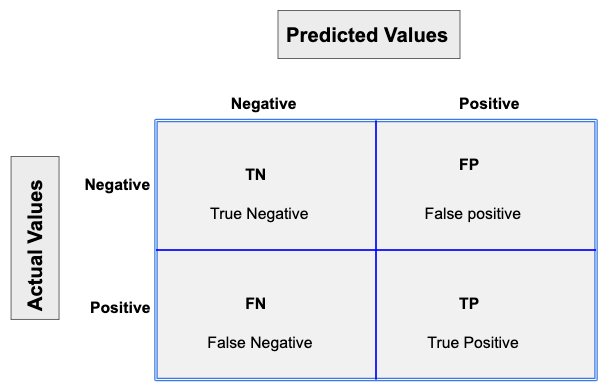

Cada predicción puede ser uno de cuatro resultados, basado en cómo coincide con el valor real:

    Verdadero Positivo (TP): Predicho Verdadero y Verdadero en realidad.
    Verdadero Negativo (TN): Predicho Falso y Falso en realidad.
    Falso Positivo (FP): Predicción de verdadero y falso en la realidad.
    Falso Negativo (FN): Predicción de falso y verdadero en la realidad.

## Ahora entendamos este concepto usando la prueba de hipótesis.

Una hipótesis es una especulación o teoría basada en pruebas insuficientes que se presta a más pruebas y experimentación. Con más pruebas, una hipótesis puede ser probada como verdadera o falsa.

Una Hipótesis Nula es una hipótesis que dice que no hay significancia estadística entre las dos variables de la hipótesis. Es la hipótesis que el investigador está tratando de refutar.

Siempre rechazamos la hipótesis nula cuando es falsa, y aceptamos la hipótesis nula cuando es realmente verdadera.

Aunque las pruebas de hipótesis se supone que son fiables, hay dos tipos de errores que pueden ocurrir.

Estos errores se conocen como errores de Tipo I y Tipo II.
Por ejemplo, cuando se examina la eficacia de una droga, la hipótesis nula sería que la droga no afecta a una enfermedad.

### Error de Tipo I: equivalente a los Falsos Positivos(FP).
El primer tipo de error posible implica el rechazo de una hipótesis nula que es verdadera.

Volvamos al ejemplo de una droga que se utiliza para tratar una enfermedad. Si rechazamos la hipótesis nula en esta situación, entonces afirmamos que la droga tiene algún efecto sobre una enfermedad. Pero si la hipótesis nula es cierta, entonces, en realidad, la droga no combate la enfermedad en absoluto. Se afirma falsamente que la droga tiene un efecto positivo en una enfermedad.

###  Error de tipo II:- equivalente a Falsos Negativos(FN).
El otro tipo de error que ocurre cuando aceptamos una hipótesis falsa nula. Este tipo de error se llama error de tipo II y también se conoce como error de segundo tipo.

Si pensamos de nuevo en el escenario en el que estamos probando una droga, ¿cómo sería un error de tipo II? Un error de tipo II ocurriría si aceptáramos que la droga no tiene efecto sobre la enfermedad, pero en realidad, sí lo tiene.
Un ejemplo de la implementación Python de la matriz de confusión.

[[11  0  0]
 [ 0 13  1]
 [ 0  0 13]]


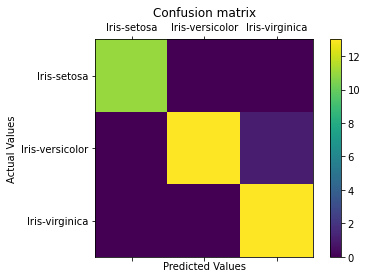

In [5]:
import warnings
import pandas as pd
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline  

#ignore warnings
warnings.filterwarnings('ignore')
# Load digits dataset
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url)
# df = df.values
X = df.iloc[:,0:4]
y = df.iloc[:,4]
#test size
test_size = 0.25
#generate the same set of random numbers
seed = 7
#Split data into train and test set. 
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=test_size, random_state=seed)
#Train Model
model = LogisticRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)

#Construct the Confusion Matrix
labels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
cm = confusion_matrix(y_test, pred, labels=labels)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

## Matriz de confusión con 3 etiquetas de clase.

Los elementos diagonales representan el número de puntos para los cuales la etiqueta predicha es igual a la etiqueta verdadera, mientras que cualquier cosa fuera de la diagonal fue mal etiquetada por el clasificador. Por lo tanto, cuanto más altos sean los valores diagonales de la matriz de confusión, mejor, indicando muchas predicciones correctas.

En nuestro caso, el clasificador predijo perfectamente las 13 plantas de setosa y 18 de virginica en los datos de prueba. Sin embargo, clasificó incorrectamente 4 de las plantas versicolor como virginica.
También hay una lista de tasas que a menudo se calculan a partir de una matriz de confusión para un clasificador binario:

## 1. Exactitud
En general, ¿con qué frecuencia es correcto el clasificador?

$$Exactitud = \frac{TP+TN}{total}$$

Cuando nuestras clases son aproximadamente iguales en tamaño, podemos usar la precisión, que nos dará valores clasificados correctamente.

La precisión es una métrica de evaluación común para los problemas de clasificación. Es el número de predicciones correctas hechas como una proporción de todas las predicciones hechas.

Tasa de clasificación errónea (Tasa de error): En general, con qué frecuencia se equivoca. Dado que la exactitud es el porcentaje que clasificamos correctamente (tasa de éxito), se deduce que nuestra tasa de error (el porcentaje en que nos equivocamos) puede calcularse de la siguiente manera:

$$Tasa de clasificación errónea = \frac{FP+FN}{total}$$

In [9]:
#import modules
import warnings
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.metrics import accuracy_score
#ignore warnings
warnings.filterwarnings('ignore')
# Load digits dataset
iris = datasets.load_iris()
# # Create feature matrix
X = iris.data
# Create target vector
y = iris.target
#test size
test_size = 0.33
#generate the same set of random numbers
seed = 7
#cross-validation settings
kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
#Model instance
model = LogisticRegression()
#Evaluate model performance
scoring = 'accuracy'
results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
print('Accuracy - val set: %.2f%% (%.2f)' % (results.mean()*100, results.std()))

#split data
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=test_size, random_state=seed)
#fit model
model.fit(X_train, y_train)
#accuracy on test set
result = model.score(X_test, y_test)
print("Accuracy - test set: %.2f%%" % (result*100.0))

Accuracy - val set: 96.67% (0.05)
Accuracy - test set: 92.00%


## 2. Precisión
Cuando predice sí, ¿con qué frecuencia es correcto?

$$Precisión=\frac{TP}{\text{predicciones sí}}$$

Cuando tenemos un desequilibrio de clase, la precisión puede convertirse en una métrica poco fiable para medir nuestro desempeño. Por ejemplo, si tuviéramos una división de 99/1 entre dos clases, A y B, donde el evento raro, B, es nuestra clase positiva, podríamos construir un modelo que fuera 99% exacto con sólo decir que todo pertenece a la clase A. Claramente, no deberíamos molestarnos en construir un modelo si no hace nada para identificar la clase B; por lo tanto, necesitamos diferentes métricas que desalienten este comportamiento. Para ello, utilizamos la precisión y la sensibilidad en lugar de la exactitud.

## 3. Exhaustividad
Cuando en realidad es un sí, ¿con qué frecuencia predice un sí?

$$\text{Tasa positiva verdadera} = \frac{TP}{\text{Si reales}}$$

La Exhaustividad nos da la tasa positiva verdadera (TPR), que es la proporción de los verdaderos positivos a todo lo positivo.

En el caso de la división 99/1 entre las clases A y B, el modelo que clasifica todo como A tendría una exhaustividad del 0% para la clase positiva, B (la precisión sería indefinida - 0/0). La exhaustividad  proporciona una mejor manera de evaluar el rendimiento del modelo ante un desequilibrio de clases. Nos dirá correctamente que el modelo tiene poco valor para nuestro caso de uso.

Al igual que la exactitud, tanto la precisión como la exhaustividad son fáciles de calcular y comprender, pero requieren umbrales. Además, la precisión y la exhaustividad sólo consideran la mitad de la matriz de confusión:


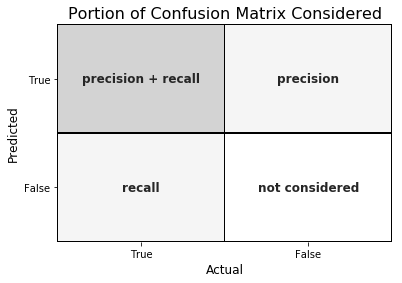

## 4. Puntuación F1
La puntuación F1 es la media armónica de la precisión y exhaustividad, donde la puntuación de la F1 alcanza su mejor valor en 1 (precisión y exhaustividad perfectas) y el peor en 0.


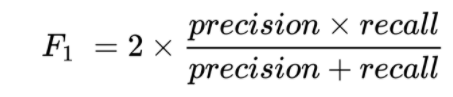

¿Por qué la media armónica? Dado que la media armónica de una lista de números se inclina fuertemente hacia últimos elementos de la lista, tiende (en comparación con la media aritmética) a mitigar el impacto de los grandes valores atípicos y a agravar el impacto de los pequeños.

Una puntuación F1 castiga más los valores extremos. Idealmente, un puntaje F1 podría ser una métrica de evaluación efectiva en los siguientes escenarios de clasificación:

    Cuando los Falsos Positivos  y la Falsos Negativos son igualmente costosos - lo que significa que se pasan verdaderos positivos o se encuentran falsos positivos - ambos impactan el modelo casi de la misma manera, como en nuestro ejemplo de clasificación de detección de cáncer
    
    Añadir más datos no cambia el resultado de manera efectiva
    
    La TN es alta (como en las predicciones de inundaciones, predicciones de cáncer, etc.)


Un ejemplo de implementación en Python de la puntuación F1.

In [10]:
import warnings
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.metrics import precision_recall_fscore_support as score, precision_score, recall_score, f1_score

warnings.filterwarnings('ignore')

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
dataframe = pandas.read_csv(url)
dat = dataframe.values
X = dat[:,:-1]
y = dat[:,-1]
test_size = 0.33
seed = 7

In [11]:
model = LogisticRegression()
#split data
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=test_size, random_state=seed)
model.fit(X_train, y_train)
pred = model.predict(X_test)
precision = precision_score(y_test, pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, pred)
print('Recall: %f' % recall)
# f1: tp / (tp + fp + fn)
f1 = f1_score(y_test, pred)
print('F1 score: %f' % f1)

Precision: 0.701493
Recall: 0.552941
F1 score: 0.618421


## 5. Especificidad
Cuando es no, ¿con qué frecuencia predice el no?

Tasa negativa real = TN/no real

Es la verdadera tasa negativa o la proporción de verdaderos negativos a todo lo que debería haber sido clasificado como negativo.
Obsérvese que, en conjunto, la especificidad y la sensibilidad consideran la matriz de confusión completa:


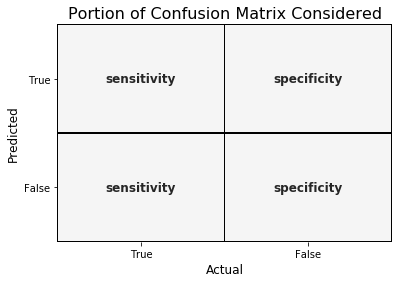

## 6. Curva de características operativas del receptor (ROC)
Medir el área bajo la curva ROC es también un método muy útil para evaluar un modelo. Al trazar la tasa positiva verdadera (sensibilidad) frente a la tasa de falsos positivos (1 - especificidad), obtenemos la curva de Característica Operativa del Receptor (ROC). Esta curva nos permite visualizar el equilibrio entre la tasa de verdaderos positivos y la tasa falsos positivos

Los siguientes son ejemplos de buenas curvas ROC. La línea discontinua sería una suposición aleatoria (sin valor predictivo) y se utiliza como línea de base; cualquier cosa por debajo de eso se considera peor que una suposición. Queremos estar hacia la esquina superior izquierda:

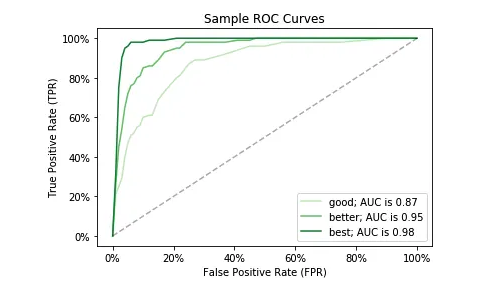


En el ejemplo anterior, la AUC está relativamente cerca de 1 y es mayor de 0,5. Un clasificador perfecto hará que la curva ROC vaya a lo largo del eje Y y luego a lo largo del eje X.


Una ejemplo de implementación en Python de las curvas ROC

AUC - Test Set: 82.85%


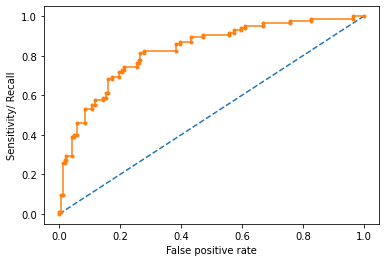

In [17]:
#Classification Area under curve
import warnings
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve

warnings.filterwarnings('ignore')

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
dataframe = pandas.read_csv(url)
dat = dataframe.values
X = dat[:,:-1]
y = dat[:,-1]
seed = 7
#split data
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=test_size, random_state=seed)
model.fit(X_train, y_train)

# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]

auc = roc_auc_score(y_test, probs)
print('AUC - Test Set: %.2f%%' % (auc*100))

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False positive rate')
plt.ylabel('Sensitivity/ Recall')
# show the plot
plt.show()

## 7. Pérdida logarítmica
La pérdida logarítmica es la métrica de clasificación más importante basada en probabilidades.

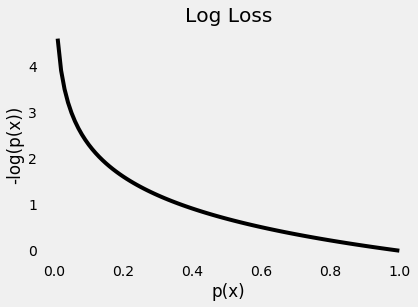

A medida que la probabilidad predicha de la clase verdadera se acerca a cero, la pérdida 
aumenta exponencialmente:

Mide el desempeño de un modelo de clasificación en el que la entrada de la predicción es un valor de probabilidad entre 0 y 1. La pérdida logarítmica aumenta a medida que la probabilidad predicha se aleja de la etiqueta real. El objetivo de cualquier modelo de aprendizaje automático es minimizar este valor. Por lo tanto, una pérdida logarítmica menor es mejor, con un modelo perfecto teniendo una pérdida logarítmica de 0.

Una muestra de la implementación en Python de la pérdida logarítmica

In [15]:
#Classification LogLoss
import warnings
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

warnings.filterwarnings('ignore')
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
dataframe = pandas.read_csv(url)
dat = dataframe.values
X = dat[:,:-1]
y = dat[:,-1]
seed = 7
#split data
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=test_size, random_state=seed)
model.fit(X_train, y_train)
#predict and compute logloss
pred = model.predict(X_test)
accuracy = log_loss(y_test, pred)
print("Logloss: %.2f" % (accuracy))

Logloss: 7.89


## 8. Índice Jaccard
El índice Jaccard es una de las formas más simples de calcular y averiguar la exactitud de un modelo de clasificación de aprendizaje automático. Entendamoslo con un ejemplo. Supongamos que tenemos un conjunto de pruebas etiquetadas, con etiquetas como -

y = [0,0,0,0,0,1,1,1,1,1]

Y nuestro modelo ha predicho las etiquetas como…


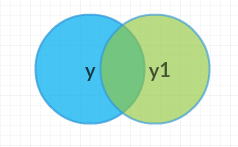

y1 = [1,1,0,0,0,1,1,1,1,1]

El anterior diagrama de Venn nos muestra las etiquetas del conjunto de pruebas y las etiquetas de las predicciones, y su intersección y unión.

El índice Jaccard o coeficiente de similitud Jaccard es una estadística utilizada para comprender las similitudes entre los conjuntos de muestras. La medición enfatiza la similitud entre conjuntos de muestras finitas y se define formalmente como el tamaño de la intersección dividido por el tamaño de la unión de los dos conjuntos etiquetados, con la fórmula como -


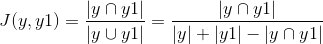


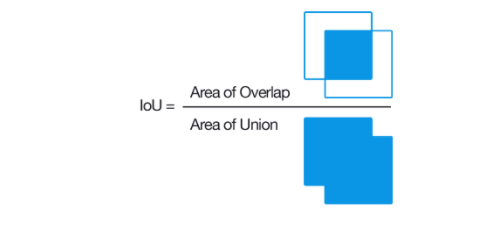

Así, para nuestro ejemplo, podemos ver que la intersección de los dos conjuntos es igual a 8 (ya que ocho valores se predicen correctamente) y la unión es 10 + 10-8 = 12. Por lo tanto, el índice Jaccard nos da la precisión como -

Así que la precisión de nuestro modelo, según el índice Jaccard, se convierte en 0.66, o 66%.

Cuanto mayor sea el índice Jaccard, mayor será la precisión del clasificador.

Una muestra de implementación en Python del índice Jaccard.



In [14]:
import numpy as np

def compute_jaccard_similarity_score(x, y):
    intersection_cardinality = len(set(x).intersection(set(y)))
    union_cardinality = len(set(x).union(set(y)))
    return intersection_cardinality / float(union_cardinality)

score = compute_jaccard_similarity_score(np.array([0, 1, 2, 5, 6]), np.array([0, 2, 3, 5, 7, 9]))
print("Jaccard Similarity Score : %s" %score)

Jaccard Similarity Score : 0.375


## 9. Gráfico de Kolmogorov Smirnov
El gráfico K-S o Kolmogorov-Smirnov mide el rendimiento de los modelos de clasificación. Más exactamente, K-S es una medida del grado de separación entre las distribuciones positivas y negativas.


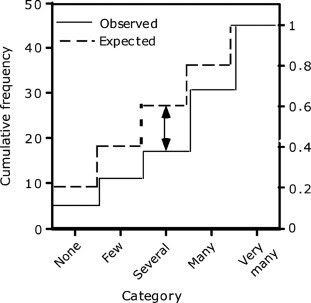


La frecuencia acumulativa de las distribuciones observadas y de las hipótesis se traza en relación con las frecuencias ordenadas. La doble flecha vertical indica la máxima diferencia vertical.

La K-S es 100 si las puntuaciones dividen la población en dos grupos separados en los que un grupo contiene todos los positivos y el otro todos los negativos. Por otra parte, si el modelo no puede diferenciar entre los positivos y los negativos, entonces es como si el modelo seleccionara casos al azar de la población. El K-S sería 0.

En la mayoría de los modelos de clasificación la K-S caerá entre 0 y 100, y cuanto más alto sea el valor mejor será el modelo para separar los casos positivos de los negativos.

La K-S también puede utilizarse para comprobar si dos distribuciones de probabilidad unidimensionales subyacentes difieren. Es una forma muy eficiente de determinar si dos muestras son significativamente diferentes entre sí.

Un ejemplo de la implementación en Python  del Kolmogorov-Smirnov.

In [14]:
from scipy.stats import kstest 
import random 
  
# N = int(input("Enter number of random numbers: ")) 
N = 10
  
actual =[] 
print("Enter outcomes: ") 
  
for i in range(N): 
    # x = float(input("Outcomes of class "+str(i + 1)+": ")) 
    actual.append(random.random()) 

print(actual) 
print()
x = kstest(actual, "norm")    
print(x)

Enter outcomes: 
[0.12739204579836916, 0.16060107530387868, 0.8419961944315608, 0.7244132005928755, 0.060269813451750975, 0.6633779650298565, 0.563044289003874, 0.9967571317366285, 0.5890981369572984, 0.6717545809940046]

KstestResult(statistic=0.5240296281991013, pvalue=0.00439507198097585)


## 10. Gráfico de ganancia y elevación
La ganancia o el levantamiento es una medida de la eficacia de un modelo de clasificación calculado como la relación entre los resultados obtenidos con y sin el modelo. Los gráficos de ganancia y elevación son ayudas visuales para evaluar el rendimiento de los modelos de clasificación. Sin embargo, en contraste con la matriz de confusión que evalúa los modelos en toda la población, el gráfico de ganancia o elevación evalúa el rendimiento del modelo en una porción de la población.

Cuanto mayor sea la elevación (es decir, cuanto más lejos esté de la línea de base), mejor será el modelo.

El siguiente gráfico de ganancias, ejecutado en un conjunto de validación, muestra que con el 50% de los datos, el modelo contiene el 90% de los objetivos, la adición de más datos añade un aumento insignificante en el porcentaje de objetivos incluidos en el modelo.

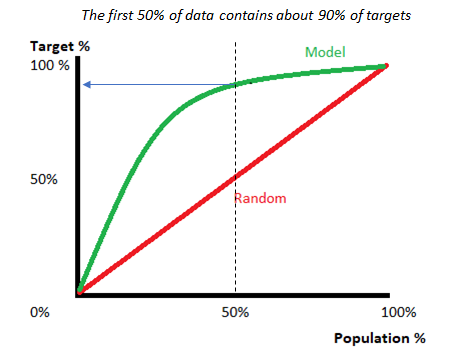



Los gráficos de elevación suelen presentarse como un gráfico de ascenso acumulativo, que también se conoce como gráfico de ganancias. Por lo tanto, los gráficos de ganancias a veces se denominan (quizás de forma confusa) "gráficos de elevación", pero son más exactos como gráficos de ascenso acumulativo.

Uno de sus usos más comunes es en el marketing, para decidir si vale la pena llamar a un posible cliente.

## 11. Coeficiente de Gini
El coeficiente de Gini o Índice de Gini es una métrica popular para los valores de clase desequilibrados. El coeficiente oscila entre 0 y 1, donde 0 representa la igualdad perfecta y 1 la desigualdad perfecta. Aquí, si el valor de un índice es mayor, entonces los datos estarán más dispersos.

El coeficiente de Gini puede calcularse a partir del área bajo la curva ROC usando la siguiente fórmula:

Coeficiente de Gini = (2 * curva_ROC) - 1



## Conclusión
Comprender lo bien que un modelo de aprendizaje automático va a funcionar con datos no vistos es el propósito final de trabajar con estas métricas de evaluación. Métricas como la exactitud, la precisión, la exhaustividad son buenas formas de evaluar los modelos de clasificación para conjuntos de datos equilibrados. 

Pero si los datos están desequilibrados y hay una disparidad de clases, entonces otros métodos como el ROC/AUC, el coeficiente de Gini funcionan mejor en la evaluación del rendimiento del modelo.